In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import numpy as np

2024-01-31 11:19:46.998337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-31 11:19:49.811221: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-31 11:19:51.460618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-31 11:19:51.460639: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
NUMEPOCHS = 100
PHASEMAX = 100
PERCENTPILEUP = 0.5
NUMTRAINING = 20000
ModelOutputName = 'tanner_test'
AUGMENTATION = 8
TRACELENGTH = 250
INPUTSIZE = TRACELENGTH-4*AUGMENTATION

In [4]:
def TraceNet():
    input = layers.Input(shape=(INPUTSIZE,1))
    conv1 = layers.Conv1D(kernel_size=4, filters=16, activation='relu', name='conv1')(input)
    # conv1_dropout = layers.Dropout(0.2, name='conv1_dropout')(conv1)
    # conv2 = layers.Conv1D(kernel_size=4, filters=8, activation='relu', name='conv2')(conv1_dropout)
    # conv2_dropout = layers.Dropout(0.2, name='conv2_dropout')(conv2)
    # conv3 = layers.Conv1D(kernel_size=4, filters=16, activation='relu', name='conv3')(conv2_dropout)
    # conv3_maxpool = layers.MaxPooling1D(pool_size=2, name='conv3_maxpool')(conv3)

    flatten1 = layers.Flatten(name='flatten1')(conv1)
    dense1 = layers.Dense(32, activation='relu', name='dense1')(flatten1)
    denseout = layers.Dense(1, activation='linear', name='pileupoutput')(dense1)
    model = models.Model(inputs=input, outputs=denseout)
    model.summary()


    # flatten1 = layers.Flatten(name='flatten1')(input)
    # dense1 = layers.Dense(64, activation='relu', name='dense1')(flatten1)
    # conv1 = layers.Conv1D(kernel_size=10, filters=10, activation='relu', name='conv1')(input)
    # conv1_dropout = layers.Dropout(0.2, name='conv1_dropout')(conv1)
    # conv2 = layers.Conv1D(kernel_size=1, filters=10, activation='relu', name='conv2')(conv1_dropout)
    # conv2_dropout = layers.Dropout(0.2, name='conv2_dropout')(conv2)
    # flatten1 = layers.Flatten(name='flatten1')(conv2_dropout)
    # dense1 = layers.Dense(10, activation='relu', name='dense1')(flatten1)
    # denseout = layers.Dense(1, activation='linear', name='pileupoutput')(dense1)
    # model = models.Model(inputs=input, outputs=denseout)
    # model.summary()


    # # RNN
    # rnn1 = layers.Bidirectional(layers.LSTM(10, return_sequences=True, name='rnn1'))(conv1)
    # rnn1_dropout = layers.Dropout(0.2, name='rnn1_dropout')(rnn1)
    
    # Dense
    # flatten1 = layers.Flatten(name='flatten1')(rnn1_dropout)
    # dense1 = layers.Dense(10, activation='relu', name='dense1')(flatten1)
    # denseout = layers.Dense(1, activation='linear', name='pileupoutput')(dense1)
    # model = models.Model(inputs=input, outputs=denseout)
    # model.summary()

    # Dense
    # flatten1 = layers.Flatten(name='flatten1')(rnn1_dropout)
    # dense1 = layers.Dense(2, activation='relu', name='dense1')(flatten1)
    # denseout = layers.Dense(1, activation='sigmoid', name='pileupoutput')(dense1)
    # model = models.Model(inputs=input, outputs=denseout)
    # model.summary()



    # conv2 = layers.Conv1D(kernel_size=1, filters=5, activation='relu', name='conv2')(conv1_dropout)
    # conv2_dropout = layers.Dropout(0.2, name='conv2_dropout')(conv2)
    # flatten1 = layers.Flatten(name='flatten1')(conv1_dropout)
    # dense1 = layers.Dense(10, activation='relu', name='dense1')(flatten1)
    # denseout = layers.Dense(1, activation='sigmoid', name='pileupoutput')(dense1)
    # model = models.Model(inputs=input, outputs=denseout)
    # model.summary()
    return model 

def AmpNet():
    input = layers.Input(shape=(INPUTSIZE,1))
    conv1 = layers.Conv1D(kernel_size=10, filters=16, activation='tanh', name='conv1')(input)
    # conv1_dropout = layers.Dropout(0.2, name='conv1_dropout')(conv1)
    # conv2 = layers.Conv1D(kernel_size=1, filters=64, activation='relu', name='conv2')(conv1_dropout)
    # conv2_dropout = layers.Dropout(0.2, name='conv2_dropout')(conv2)
    # conv3 = layers.Conv1D(kernel_size=2, filters=64, activation='relu', padding='same', name='conv3')(conv2_dropout)
    # conv3_dropout = layers.Dropout(0.2, name='conv3_dropout')(conv3)
    flatten1 = layers.Flatten(name='flatten1')(conv1)
    dense1 = layers.Dense(128, activation='relu', name='dense1')(flatten1)
    denseout = layers.Dense(1, activation='linear', name='pileupoutput')(dense1)
    model = models.Model(inputs=input, outputs=denseout)
    model.summary()
    return model
  
def PhaseNet():
    input = layers.Input(shape=(INPUTSIZE,1))
    conv1 = layers.Conv1D(kernel_size=10, filters=16, activation='relu', name='conv1')(input)
    # conv1_dropout = layers.Dropout(0.2, name='conv1_dropout')(conv1)
    # conv2 = layers.Conv1D(kernel_size=1, filters=64, activation='relu', name='conv2')(conv1_dropout)
    # conv2_dropout = layers.Dropout(0.2, name='conv2_dropout')(conv2)
    # conv3 = layers.Conv1D(kernel_size=2, filters=64, activation='relu', padding='same', name='conv3')(conv2_dropout)
    # conv3_dropout = layers.Dropout(0.2, name='conv3_dropout')(conv3)
    flatten1 = layers.Flatten(name='flatten1')(conv1)
    dense1 = layers.Dense(128, activation='relu', name='dense1')(flatten1)
    denseout = layers.Dense(1, activation='linear', name='pileupoutput')(dense1)
    model = models.Model(inputs=input, outputs=denseout)
    model.summary()
    return model

In [5]:
def GetData(filename,branch="trace",treename="timing"):
    '''
    Returns TFile as a pandas dataframe
    '''
    try: 
        import uproot
        import awkward as ak
        import numpy as np
    except ImportError:
        print("Please install uproot, awkward, numpy, and pandas")
        return
  
    file = uproot.open(filename)
    tree = file[treename]
    npdf = ak.to_numpy(tree[branch].arrays()[branch])
    return npdf

def GetDataSet(type = "pileup",fname = "DataSmallFloat.root", tname = "OutputTree"):
   
    try: 
        import pandas as pd
        import numpy as np
    except ImportError:
        print("Please install pandas")
        return
    
    vars = []
    if type == "pileup":
        vars.append("trace")
    elif type == "amp":
        vars.append("trace")
        vars.append("amp")
    elif type == "phase":
        vars.append("trace")
        vars.append("phase")
    else:
        print("Unknown type")
        return

    data = {}
    for var in vars:
        data[var] = GetData(fname,var,tname)
    
    if type == "pileup":
        phase = GetData(fname,"phase",tname)
        data["pileup"] = np.where(phase > 0, 1, 0)
    
    # train test split
    train_frac = 0.8
    train_size = int(len(data["trace"])*train_frac)
    test_size = len(data["trace"]) - train_size
    print("Train size: ",train_size)
    print("Test size: ",test_size)
    
    x = np.array(data["trace"])
    y = np.array(data[type])
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=train_frac)


    return x_train, x_test, y_train, y_test

In [6]:
trace_train, trace_test, pileup_train, pileup_test = GetDataSet(type="phase")

Train size:  430532
Test size:  107633


n:  226150
n/total:  0.525280350821774
n:  56617
n/total:  0.5260189718766549


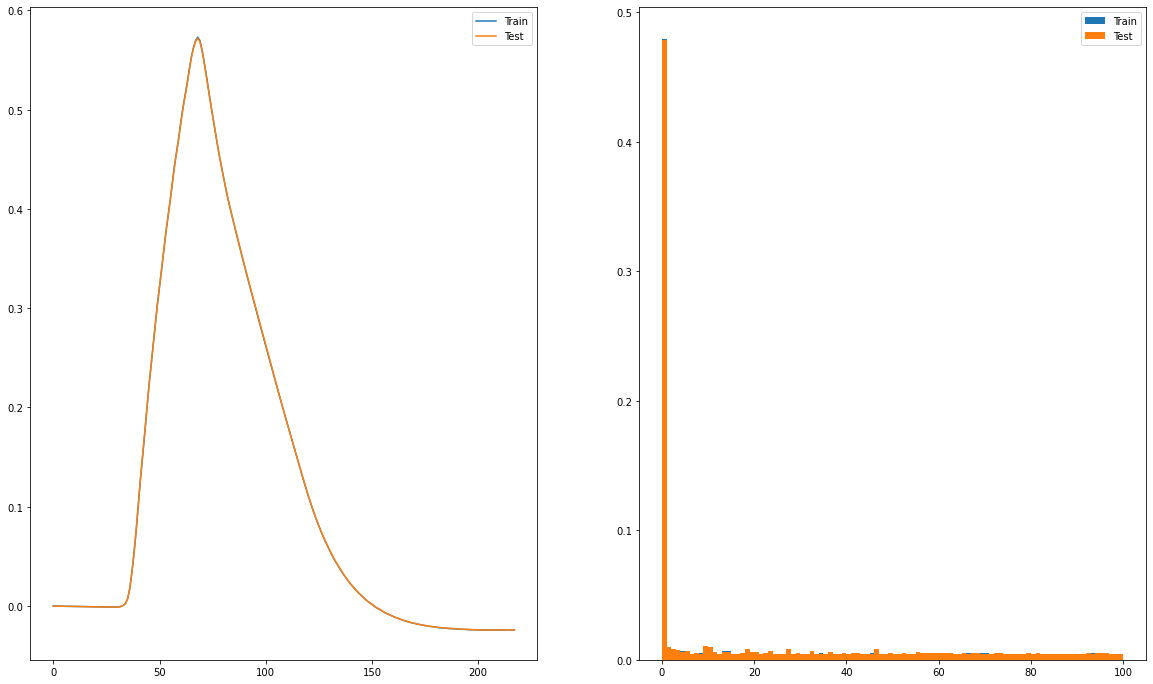

In [7]:
import matplotlib.pyplot as plt

fig , axs = plt.subplots(1,2, figsize=(20,12))
ax = axs[0]
avg_trace_train = np.mean(trace_train,axis=0)
avg_trace_test = np.mean(trace_test,axis=0)
ax.plot(avg_trace_train, label="Train")
ax.plot(avg_trace_test, label="Test")
ax.legend()

ax = axs[1]
ax.hist(pileup_train, bins=100, label="Train", density=True)
ax.hist(pileup_test, bins=100, label="Test", density=True)

# n non-zero phases
n = np.count_nonzero(pileup_train)
print("n: ",n)
# n/total
print("n/total: ",n/len(pileup_train))

# n non-zero phases
n = np.count_nonzero(pileup_test)
print("n: ",n)
# n/total
print("n/total: ",n/len(pileup_test))
ax.legend()
plt.show()




In [ ]:
### PhaseNet
Default | loss: 5.1060 (53,997) 21 epochs 
Minimized | loss: 5.40 (46,997) 24 epochs
No Conv | loss: 4.5 (110,225) Never converged
Relu | loss : 3.8 (110,225) Never converged



In [11]:
trace_train, trace_test, pileup_train, pileup_test = GetDataSet(type="phase")
model = TraceNet()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# # early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# # model checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint(ModelOutputName+'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(trace_train, pileup_train, epochs=NUMEPOCHS, batch_size=64, validation_split=0.5, callbacks=[es,mc])

Train size:  430532
Test size:  107633
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 218, 1)]          0         
                                                                 
 conv1 (Conv1D)              (None, 215, 16)           80        
                                                                 
 flatten1 (Flatten)          (None, 3440)              0         
                                                                 
 dense1 (Dense)              (None, 32)                110112    
                                                                 
 pileupoutput (Dense)        (None, 1)                 33        
                                                                 
Total params: 110,225
Trainable params: 110,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33

KeyboardInterrupt: 